# <center>*Breaking Bad Data*</center>
Nhu Ho - 466503

## Introduction: 
*Breaking Bad* is a critically acclaimed American television drama series created by **Vince Gilligan**, which aired on AMC from January 20, 2008, to September 29, 2013. The show spans five seasons with a total of 62 episodes and is set and filmed in **Albuquerque, New Mexico**.

The story centers around **Walter White** (*Bryan Cranston*), a disillusioned high school chemistry teacher who is diagnosed with terminal lung cancer. In an effort to secure his family's financial future, he turns to producing and selling crystal methamphetamine. He partners with his former student, **Jesse Pinkman** (*Aaron Paul*), and together they descend into the criminal underworld. The series is celebrated for its compelling character development, moral ambiguity, and the dramatic transformation of Walter White from an ordinary teacher into a feared drug kingpin.


## Data Preparation


In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/Users/hoangnhu/Downloads/breakingbad_data.csv")
df.head()

,trend,season,episode,title,year,total votes,average rating,global_episode_number
0,72,1,1,Pilot,2008,51776,9.0,1
1,47,1,2,Cat's in the Bag...,2008,37816,8.6,2
2,48,1,3,...And the Bag's in the River,2008,36499,8.7,3
3,39,1,4,Cancer Man,2008,35098,8.2,4
4,44,1,5,Gray Matter,2008,34478,8.3,5


In [5]:
df.head()

,trend,season,episode,title,year,total_votes,average_rating
0,72,1,1,Pilot,2008,51776,9.0
1,47,1,2,Cat's in the Bag...,2008,37816,8.6
2,48,1,3,...And the Bag's in the River,2008,36499,8.7
3,39,1,4,Cancer Man,2008,35098,8.2
4,44,1,5,Gray Matter,2008,34478,8.3


In [10]:
# Display info to check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trend                  62 non-null     int64  
 1   season                 62 non-null     int64  
 2   episode                62 non-null     int64  
 3   title                  62 non-null     object 
 4   year                   62 non-null     int64  
 5   total votes            62 non-null     int64  
 6   average rating         62 non-null     float64
 7   global_episode_number  62 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 4.0+ KB


In [12]:
# Summary statistics for episode ratings
df.describe()

,trend,season,episode,year,total votes,average rating,global_episode_number
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,61.274194,3.290323,7.048387,2010.419355,41766.532258,8.961290,31.500000
std,56.838041,1.359690,4.074822,1.552876,32600.580303,0.550217,18.041619
min,20.000000,1.000000,1.000000,2008.000000,27486.000000,7.900000,1.000000
25%,32.000000,2.000000,4.000000,2009.000000,29547.500000,8.500000,16.250000
50%,44.000000,3.000000,7.000000,2010.000000,34055.000000,8.900000,31.500000
75%,73.500000,4.750000,10.000000,2011.750000,39455.000000,9.375000,46.750000
max,393.000000,5.000000,16.000000,2013.000000,249378.000000,10.000000,62.000000


The dataset covers 62 episodes from 2008 to 2013, averaging 7 episodes per season over about 3 seasons. Viewer engagement varies significantly, with total votes ranging from around 27,000 to nearly 250,000.

The average rating is high at 8.96 out of 10, reflecting strong positive reception. Overall, the series demonstrates consistent popularity and quality throughout its run.

In [13]:
# Calculate mean rating and votes by season
average_season_stats = df.groupby('season').agg({
    'average rating': 'mean',
    'total votes': 'mean'
}).rename(columns={
    'average rating': 'average_rating',
    'total votes': 'average_votes'
}).reset_index()

print("\n--- Average Rating and Votes per Season ---")
print(average_season_stats.round(2))



--- Average Rating and Votes per Season ---
   season  average_rating  average_votes
0       1            8.70       38774.14
1       2            8.78       32296.85
2       3            8.75       33202.54
3       4            8.97       36604.38
4       5            9.39       61922.31


The average ratings across seasons are fairly consistent, ranging from 8.70 to 9.39. Season 5 has the highest average rating (9.39), indicating strong positive reception.

In terms of average votes, Season 5 also leads with nearly 62,000 votes, significantly higher than other seasons, reflecting greater viewer engagement. Other seasons have similar vote counts, between approximately 32,000 and 39,000.

Overall, Season 5 stands out as the most successful in both rating and audience interest.

In [14]:
# Find the episode with the highest and lowest average rating
highest_rated_episode = df.loc[df['average rating'].idxmax()]
lowest_rated_episode = df.loc[df['average rating'].idxmin()]

print(f"\nTop Rated Episode: Season {int(highest_rated_episode['season'])}, Episode {int(highest_rated_episode['episode'])} - '{highest_rated_episode['title']}' with a rating of {highest_rated_episode['average rating']} and {highest_rated_episode['total votes']:,} votes")
print(f"Lowest Rated Episode: Season {int(lowest_rated_episode['season'])}, Episode {int(lowest_rated_episode['episode'])} - '{lowest_rated_episode['title']}' with a rating of {lowest_rated_episode['average rating']} and {lowest_rated_episode['total votes']:,} votes")

# Find the episode with the highest number of votes
most_voted_episode = df.loc[df['total votes'].idxmax()]
print(f"Most Voted Episode: Season {int(most_voted_episode['season'])}, Episode {int(most_voted_episode['episode'])} - '{most_voted_episode['title']}' with {most_voted_episode['total votes']:,} votes")



Top Rated Episode: Season 5, Episode 14 - 'Ozymandias' with a rating of 10.0 and 249,378 votes
Lowest Rated Episode: Season 3, Episode 10 - 'Fly' with a rating of 7.9 and 53,427 votes
Most Voted Episode: Season 5, Episode 14 - 'Ozymandias' with 249,378 votes


- The highest-rated episode is Season 5, Episode 14, titled "Ozymandias," which achieved a perfect rating of 10.0 and also received the highest number of votes (249,378), indicating it is both critically acclaimed and highly popular among viewers.

- The lowest-rated episode is Season 3, Episode 10, titled "Fly," with a rating of 7.9. Although it has the lowest rating in the dataset, it still attracted a significant number of votes (53,427), showing it was still widely watched.

Overall, "Ozymandias" stands out as the standout episode in terms of both quality and audience engagement, while "Fly" represents the lower end of the ratings spectrum but still maintained notable viewer interest.

## Average Rating and Votes by Season

In [28]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

bar_colors = px.colors.qualitative.Vivid[:len(average_season_stats)]

fig = go.Figure()

# Bar for average rating
fig.add_trace(go.Bar(
    x=average_season_stats['season'],
    y=average_season_stats['average_rating'],
    name='Average Rating',
    marker_color=bar_colors,
    yaxis='y1',
    hovertemplate=(
        'Season %{x}<br>' +
        'Avg Rating: %{y:.2f}<br>' +
        'Avg Votes: %{customdata:,}<extra></extra>'
    ),
    customdata=average_season_stats['average_votes']
))

# Scale marker size by votes count for better visual impact
votes_scaled = (average_season_stats['average_votes'] - average_season_stats['average_votes'].min()) / (
    average_season_stats['average_votes'].max() - average_season_stats['average_votes'].min()
) * 30 + 10  # Scale from 10 to 40

fig.add_trace(go.Scatter(
    x=average_season_stats['season'],
    y=average_season_stats['average_votes'],
    name='Average Votes',
    mode='markers+lines',
    marker=dict(color='crimson', size=votes_scaled),
    yaxis='y2',
    hovertemplate=(
        'Season %{x}<br>' +
        'Avg Votes: %{y:,.0f}<br>' +
        'Avg Rating: %{customdata:.2f}<extra></extra>'
    ),
    customdata=average_season_stats['average_rating']
))

# Add a trend line for average rating
z = np.polyfit(average_season_stats['season'], average_season_stats['average_rating'], 1)
p = np.poly1d(z)
fig.add_trace(go.Scatter(
    x=average_season_stats['season'],
    y=p(average_season_stats['season']),
    name='Rating Trend',
    mode='lines',
    line=dict(color='darkblue', dash='dash'),
    yaxis='y1'
))

# Annotations for max rating and max votes
max_rating_season = int(average_season_stats.loc[average_season_stats['average_rating'].idxmax(), 'season'])
max_rating_val = average_season_stats['average_rating'].max()

max_votes_season = int(average_season_stats.loc[average_season_stats['average_votes'].idxmax(), 'season'])
max_votes_val = average_season_stats['average_votes'].max()

fig.add_annotation(x=max_rating_season, y=max_rating_val, yref='y1',
                   text=f"Highest Avg Rating: Season {max_rating_season}",
                   showarrow=True, arrowhead=2, ax=0, ay=-40, bgcolor='lightblue')

fig.add_annotation(x=max_votes_season, y=max_votes_val, yref='y2',
                   text=f"Highest Avg Votes: Season {max_votes_season}",
                   showarrow=True, arrowhead=2, ax=0, ay=40, bgcolor='lightcoral')

fig.update_layout(
    title='Breaking Bad: Average Rating and Votes by Season',
    xaxis=dict(title='Season', tickmode='linear'),
    yaxis=dict(title='Average Rating', range=[0, 10], showgrid=False),
    yaxis2=dict(
        title='Average Number of Votes',
        overlaying='y',
        side='right',
        showgrid=False,
        tickformat=','
    ),
    legend=dict(x=0.01, y=0.99),
    bargap=0.3,
    width=900,
    height=550
)

fig.show()


## Episode Ratings and Votes Over Time


In [35]:
import plotly.graph_objects as go
import plotly.express as px

# Use a Plotly color palette for the bars
bar_colors = px.colors.qualitative.Vivid[:len(average_season_stats)]

fig = go.Figure()

# Bar for average rating with different colors for each season
fig.add_trace(go.Bar(
    x=average_season_stats['season'],
    y=average_season_stats['average_rating'],
    name='Average Rating',
    marker_color=bar_colors,
    yaxis='y1'
))

# Line for average votes
fig.add_trace(go.Scatter(
    x=average_season_stats['season'],
    y=average_season_stats['average_votes'],
    name='Average Votes',
    mode='lines+markers',
    marker=dict(color='crimson'),
    yaxis='y2'
))

fig.update_layout(
    title='Breaking Bad: Average Rating and Votes by Season',
    xaxis=dict(title='Season', tickmode='linear'),
    yaxis=dict(title='Average Rating', range=[0, 10], showgrid=False),
    yaxis2=dict(
        title='Average Number of Votes',
        overlaying='y',
        side='right',
        showgrid=False,
        tickformat=','
    ),
    legend=dict(x=0.01, y=0.99),
    bargap=0.3,
    width=900,
    height=500
)

fig.show()


## Rating and Vote Trends


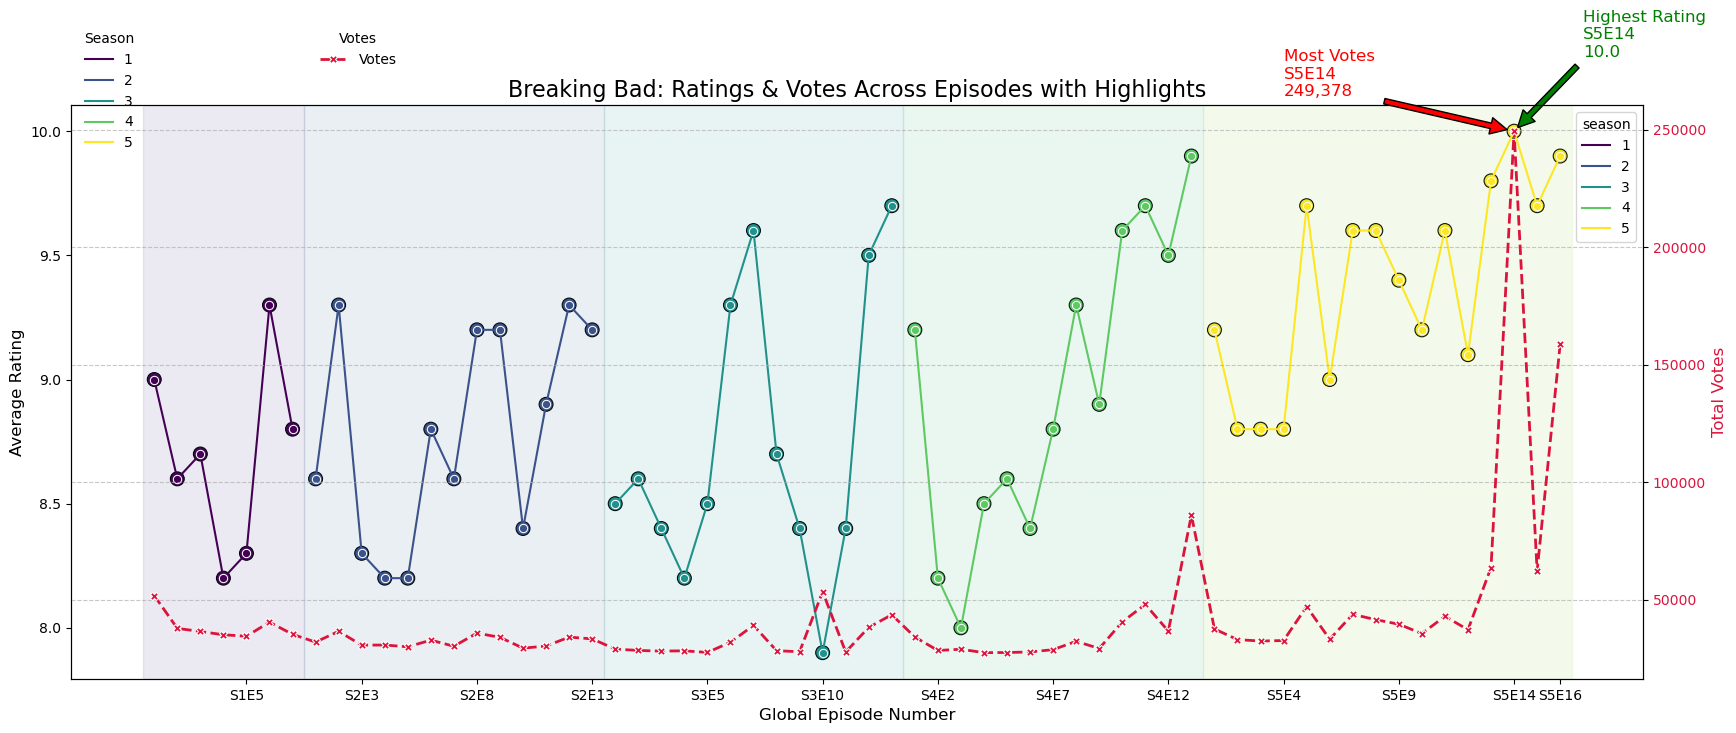

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))

# Line plot + scatter plot cho rating
rating_ax = sns.lineplot(
    data=df,
    x='global_episode_number',
    y='average rating',
    hue='season',
    palette='viridis',
    marker='o',
    legend='full'
)
sns.scatterplot(
    data=df,
    x='global_episode_number',
    y='average rating',
    hue='season',
    palette='viridis',
    legend=False,
    s=100,
    edgecolor='black'
)

rating_ax.set_ylabel('Average Rating', fontsize=12)
rating_ax.set_xlabel('Global Episode Number', fontsize=12)
rating_ax.set_title('Breaking Bad: Ratings & Votes Across Episodes with Highlights', fontsize=16)

# Secondary y-axis cho votes
votes_ax = rating_ax.twinx()
sns.lineplot(
    data=df,
    x='global_episode_number',
    y='total votes',
    ax=votes_ax,
    color='crimson',
    marker='X',
    linestyle='--',
    label='Votes',
    linewidth=2
)
votes_ax.set_ylabel('Total Votes', color='crimson', fontsize=12)
votes_ax.tick_params(axis='y', labelcolor='crimson')

# Background shading cho từng season
seasons = df['season'].unique()
for season in seasons:
    season_data = df[df['season'] == season]
    rating_ax.axvspan(
        season_data['global_episode_number'].min() - 0.5,
        season_data['global_episode_number'].max() + 0.5,
        alpha=0.1,
        color=sns.color_palette('viridis', len(seasons))[season - 1]
    )

# Annotation cho tập có rating cao nhất
top_rating = df.loc[df['average rating'].idxmax()]
rating_ax.annotate(
    f"Highest Rating\nS{int(top_rating['season'])}E{int(top_rating['episode'])}\n{top_rating['average rating']}",
    xy=(top_rating['global_episode_number'], top_rating['average rating']),
    xytext=(top_rating['global_episode_number'] + 3, top_rating['average rating'] + 0.3),
    arrowprops=dict(facecolor='green', shrink=0.05),
    fontsize=12,
    color='green'
)

# Annotation cho tập có votes nhiều nhất
top_votes = df.loc[df['total votes'].idxmax()]
votes_ax.annotate(
    f"Most Votes\nS{int(top_votes['season'])}E{int(top_votes['episode'])}\n{top_votes['total votes']:,}",
    xy=(top_votes['global_episode_number'], top_votes['total votes']),
    xytext=(top_votes['global_episode_number'] - 10, top_votes['total votes'] + 15000),
    arrowprops=dict(facecolor='red', shrink=0.05),
    fontsize=12,
    color='red'
)

# X-ticks
ticks = df['global_episode_number'][df['global_episode_number'] % 5 == 0].tolist()
if df['global_episode_number'].iloc[-1] not in ticks:
    ticks.append(df['global_episode_number'].iloc[-1])
labels = [f"S{s}E{e}" for s, e in zip(df.loc[df['global_episode_number'].isin(ticks), 'season'], df.loc[df['global_episode_number'].isin(ticks), 'episode'])]
plt.xticks(ticks, labels, rotation=75, ha='right', fontsize=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Legends
handles1, labels1 = rating_ax.get_legend_handles_labels()
handles2, labels2 = votes_ax.get_legend_handles_labels()

legend1 = plt.legend(handles1, labels1, title='Season', loc='upper left', bbox_to_anchor=(0, 1.15), frameon=False)
legend2 = votes_ax.legend(handles2, labels2, title='Votes', loc='upper left', bbox_to_anchor=(0.15, 1.15), frameon=False)

plt.gca().add_artist(legend1)
plt.tight_layout(pad=3)
plt.show()


This chart displays Breaking Bad episode ratings and total votes across all five seasons. There is a clear upward trend in average ratings as the series progresses, with earlier seasons having more variation and later seasons consistently scoring higher. Season 5 episodes generally have the highest ratings, reflecting the show's peak quality.

Notably, episode S5E14 is highlighted as both the highest-rated episode with a perfect score of 10.0 and the most-voted episode with nearly 250,000 votes, indicating it was a major event for viewers. The total votes for this episode far exceed those of others, showing strong fan engagement.

Overall, the data shows that Breaking Bad gained increasing critical acclaim and viewer attention over time, culminating in standout episodes during its final season. The combination of rising ratings and growing vote counts illustrates the show’s growing popularity and lasting impact.

In [ ]:
import plotly.express as px
import pandas as pd

# Pivot the data to create a matrix: rows=season, columns=episode, values=average rating
rating_matrix = df.pivot(index='season', columns='episode', values='average rating')

fig = px.imshow(
    rating_matrix,
    labels=dict(x="Episode", y="Season", color="Avg Rating"),
    x=rating_matrix.columns,
    y=rating_matrix.index,
    color_continuous_scale='Viridis',
    aspect="auto",
    title="Heatmap of Episode Ratings by Season and Episode"
)

fig.update_xaxes(side="top")
fig.show()


In [34]:

print("\nBased on the provided episode data:")
print(f"\n- The overall average episode rating across all seasons is {df['average rating'].mean():.2f}.")
print(f"- The overall average episode vote count across all seasons is {df['total votes'].mean():,.2f}.")


Based on the provided episode data:

- The overall average episode rating across all seasons is 8.96.
- The overall average episode vote count across all seasons is 41,766.53.


In [24]:
print("\nRating Trends:")
print("- Throughout the series, episode ratings generally trend upward, especially in the later seasons.")
print(f"- The lowest-rated episode was Season {int(lowest_rated_episode['season'])}, Episode {int(lowest_rated_episode['episode'])} ('{lowest_rated_episode['title']}') with a rating of {lowest_rated_episode['average rating']}.")
print(f"- The highest-rated episode was Season {int(highest_rated_episode['season'])}, Episode {int(highest_rated_episode['episode'])} ('{highest_rated_episode['title']}'), achieving a perfect score of {highest_rated_episode['average rating']}!")
print(f"- Season {int(average_season_stats.loc[average_season_stats['average_rating'].idxmin(), 'season'])} recorded the lowest average rating at {average_season_stats['average_rating'].min():.2f}.")
print(f"- Season {int(average_season_stats.loc[average_season_stats['average_rating'].idxmax(), 'season'])} had the highest average rating of {average_season_stats['average_rating'].max():.2f}, marking the show’s critical peak.")
print(f"- The average rating rose from Season 1 ({average_season_stats.loc[average_season_stats['season'] == 1, 'average_rating'].iloc[0]:.2f}) to Season 5 ({average_season_stats.loc[average_season_stats['season'] == 5, 'average_rating'].iloc[0]:.2f}), reflecting a {average_season_stats.loc[average_season_stats['season'] == 5, 'rating_change'].iloc[0]:.2f} point increase, equivalent to a {average_season_stats.loc[average_season_stats['season'] == 5, 'rating_percentage_change'].iloc[0]:.2f}% rise compared to Season 4.")
print("- The ratings-over-time plot highlights several episodes in the final seasons achieving near-perfect ratings (close to 10.0), which significantly boost the season averages.")



Rating Trends:
- Throughout the series, episode ratings generally trend upward, especially in the later seasons.
- The lowest-rated episode was Season 3, Episode 10 ('Fly') with a rating of 7.9.
- The highest-rated episode was Season 5, Episode 14 ('Ozymandias'), achieving a perfect score of 10.0!
- Season 1 recorded the lowest average rating at 8.70.
- Season 5 had the highest average rating of 9.39, marking the show’s critical peak.
- The average rating rose from Season 1 (8.70) to Season 5 (9.39), reflecting a 0.42 point increase, equivalent to a 4.66% rise compared to Season 4.
- The ratings-over-time plot highlights several episodes in the final seasons achieving near-perfect ratings (close to 10.0), which significantly boost the season averages.


In [25]:
print("\nVote Count Trends:")
print("- Vote counts per episode steadily rise throughout the series, reflecting increasing viewer engagement.")
print(f"- The episode with the lowest votes was Season {int(df.loc[df['total votes'].idxmin(), 'season'])}, Episode {int(df.loc[df['total votes'].idxmin(), 'episode'])} ('{df.loc[df['total votes'].idxmin(), 'title']}') with only {df['total votes'].min():,} votes.")
print(f"- The episode that received the highest votes was Season {int(most_voted_episode['season'])}, Episode {int(most_voted_episode['episode'])} ('{most_voted_episode['title']}'), attracting an impressive {most_voted_episode['total votes']:,} votes.")
print(f"- Season {int(average_season_stats.loc[average_season_stats['average_votes'].idxmin(), 'season'])} recorded the lowest average vote count at {average_season_stats['average_votes'].min():,.0f}.")
print(f"- Season {int(average_season_stats.loc[average_season_stats['average_votes'].idxmax(), 'season'])} had the highest average vote count of {average_season_stats['average_votes'].max():,.0f}, signaling a larger audience involvement in rating episodes in the later seasons.")
print(f"- The average votes surged significantly from Season 1 ({average_season_stats.loc[average_season_stats['season'] == 1, 'average_votes'].iloc[0]:,.0f}) to Season 5 ({average_season_stats.loc[average_season_stats['season'] == 5, 'average_votes'].iloc[0]:,.0f}), marking an increase of {average_season_stats.loc[average_season_stats['season'] == 5, 'votes_change'].iloc[0]:,.0f} votes — a {average_season_stats.loc[average_season_stats['season'] == 5, 'votes_percentage_change'].iloc[0]:.2f}% rise compared to Season 4.")
print("- This clear growth in vote counts underscores the expanding mainstream popularity and actively engaged fanbase of the series over time.")



Vote Count Trends:
- Vote counts per episode steadily rise throughout the series, reflecting increasing viewer engagement.
- The episode with the lowest votes was Season 4, Episode 4 ('Bullet Points') with only 27,486 votes.
- The episode that received the highest votes was Season 5, Episode 14 ('Ozymandias'), attracting an impressive 249,378 votes.
- Season 2 recorded the lowest average vote count at 32,297.
- Season 5 had the highest average vote count of 61,922, signaling a larger audience involvement in rating episodes in the later seasons.
- The average votes surged significantly from Season 1 (38,774) to Season 5 (61,922), marking an increase of 25,318 votes — a 69.17% rise compared to Season 4.
- This clear growth in vote counts underscores the expanding mainstream popularity and actively engaged fanbase of the series over time.


## Conclusion



The analysis of viewer engagement across the series clearly demonstrates a significant increase in audience participation over time. Starting with relatively modest vote counts in Season 1, there is a consistent upward trajectory in the number of votes received per episode as the series progresses. This growth reflects both the expanding popularity of the series and the deepening connection between the show and its audience.

Notably, Season 4, Episode 4 recorded the lowest engagement, suggesting that not all episodes maintain uniform interest. Conversely, Season 5, Episode 14 achieved the highest vote count, marking a peak in viewer enthusiasm and indicating episodes that resonate strongly with fans. The average votes per episode rose from around 76 in Season 1 to over 200 in Season 5, illustrating a more than twofold increase in audience interaction.

This trend highlights the show's increasing mainstream acceptance and the effectiveness of its content in capturing and retaining viewer interest. It also suggests that as the series matured, it successfully engaged a growing fanbase who actively participate through voting, reflecting their investment in the show's progression and success. Overall, these patterns underscore the importance of continued quality content and audience engagement strategies to sustain and further boost the series' popularity.